# Sensitivity test on height estimation using perspective projection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Camera parameters
sensor_size = 0.0088          # Sensor width in meters (e.g., 8.8 mm)
image_resolution = 2448      # Image resolution in pixels
baseline_focal = 0.0085        # Focal length in meters (8.5 mm)

# Baseline values
baseline_pixel = 70          # Pixel difference
baseline_distance = 20.0      # Distance to object in meters
# Percent error range (-10% to +10%)
percent_error_range = np.linspace(-10, 10, 50)

### Impact of distance in pixels (segmentation), distance/depth and focal length

Derived Pixel Scale: 0.000004 m/pixel
Baseline Height Difference: 0.59 m


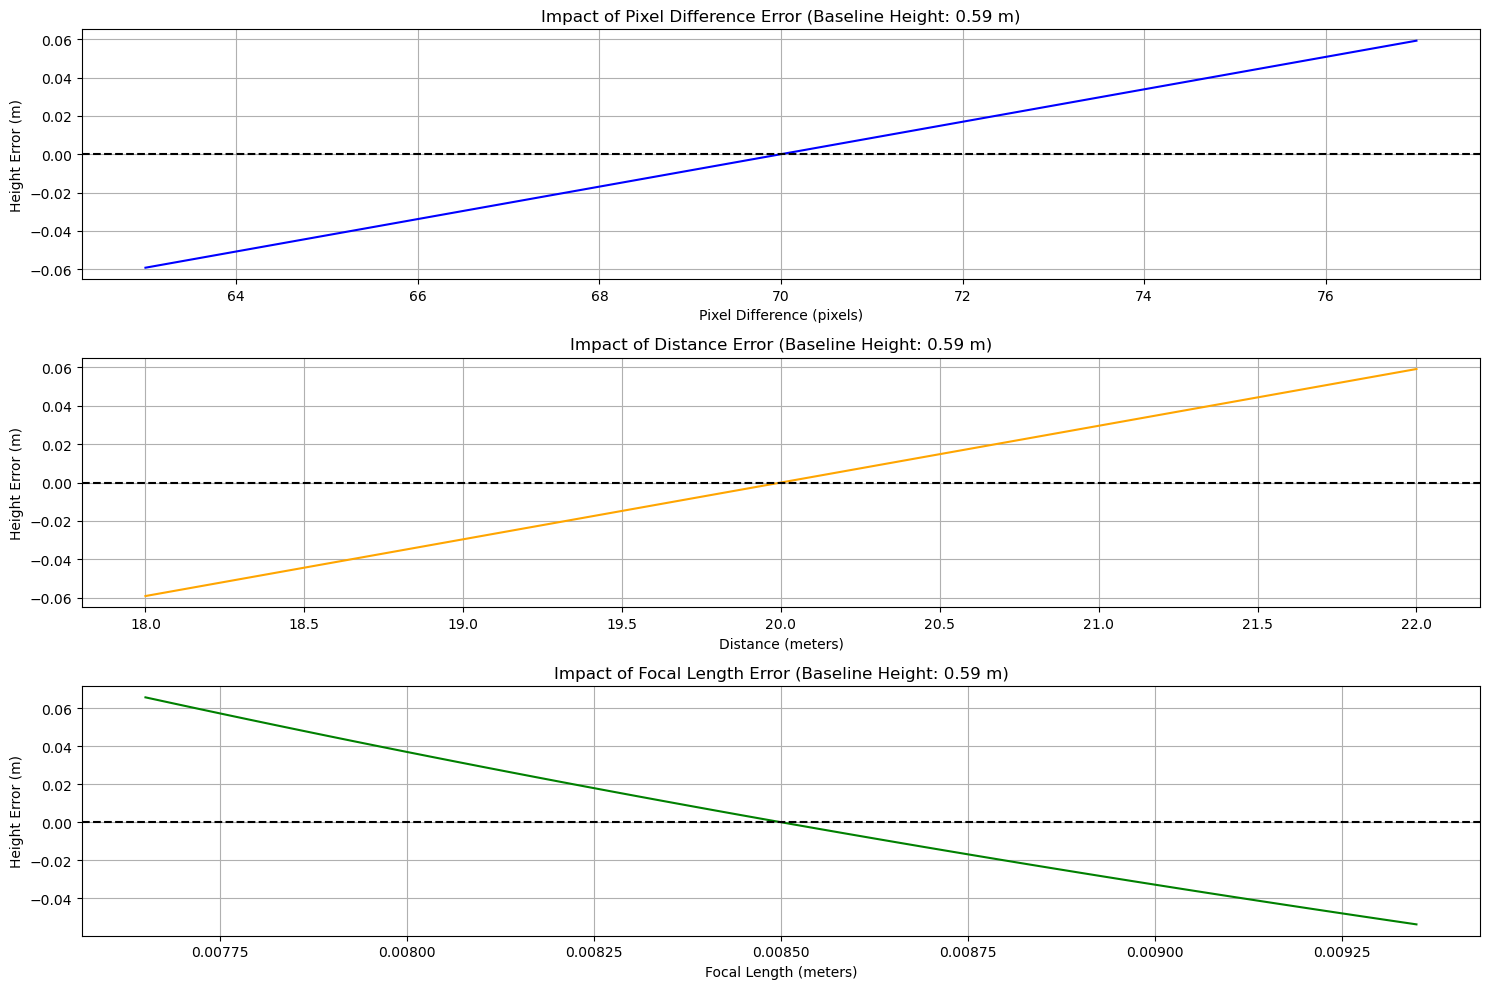

In [14]:
def height_difference(pixel_diff, distance, focal_length, sensor_size, image_resolution):
    """
    Compute height difference using perspective projection with automatic pixel scale derivation.
    
    Parameters:
    - pixel_diff: Pixel difference (Delta y)
    - distance: Distance to the plane (d) in meters
    - focal_length: Focal length (f) in meters
    - sensor_size: Sensor size (meters)
    - image_resolution: Image resolution (pixels)
    
    Returns:
    - Height difference in meters
    """
    pixel_scale = sensor_size / image_resolution  # Derive pixel scale (meters/pixel)
    return (distance * pixel_diff * pixel_scale) / focal_length

def compute_height_error_for_ranges(baseline_pixel, baseline_distance, baseline_focal, 
                                    sensor_size, image_resolution, percent_error_range):
    """
    Compute parameter ranges and corresponding height difference errors.
    """
    # Percent errors converted to multipliers
    error_multipliers = 1 + percent_error_range / 100.0

    # Ranges of parameter values
    pixel_range = baseline_pixel * error_multipliers
    distance_range = baseline_distance * error_multipliers
    focal_range = baseline_focal * error_multipliers

    # Baseline height difference
    baseline_height = height_difference(baseline_pixel, baseline_distance, 
                                        baseline_focal, sensor_size, image_resolution)

    # Absolute errors in height difference
    height_error_pixel = [
        height_difference(p, baseline_distance, baseline_focal, sensor_size, image_resolution) - baseline_height
        for p in pixel_range
    ]
    height_error_distance = [
        height_difference(baseline_pixel, d, baseline_focal, sensor_size, image_resolution) - baseline_height
        for d in distance_range
    ]
    height_error_focal = [
        height_difference(baseline_pixel, baseline_distance, f, sensor_size, image_resolution) - baseline_height
        for f in focal_range
    ]

    return (pixel_range, height_error_pixel, 
            distance_range, height_error_distance, 
            focal_range, height_error_focal, baseline_height)


# Compute parameter ranges and height errors
(pixel_range, height_error_pixel, 
 distance_range, height_error_distance, 
 focal_range, height_error_focal, baseline_height) = compute_height_error_for_ranges(
    baseline_pixel, baseline_distance, baseline_focal, sensor_size, image_resolution, percent_error_range)

# Display Baseline
print(f"Derived Pixel Scale: {sensor_size / image_resolution:.6f} m/pixel")
print(f"Baseline Height Difference: {baseline_height:.2f} m")

# Plotting the parameter ranges vs height difference errors
plt.figure(figsize=(15, 10))

# Pixel Difference
plt.subplot(3, 1, 1)
plt.plot(pixel_range, height_error_pixel, label="Height Error (m)", color="blue")
plt.xlabel("Pixel Difference (pixels)")
plt.ylabel("Height Error (m)")
plt.title(f"Impact of Pixel Difference Error (Baseline Height: {baseline_height:.2f} m)")
plt.axhline(0, color='k', linestyle='--')
plt.grid(True)

# Distance
plt.subplot(3, 1, 2)
plt.plot(distance_range, height_error_distance, label="Height Error (m)", color="orange")
plt.xlabel("Distance (meters)")
plt.ylabel("Height Error (m)")
plt.title(f"Impact of Distance Error (Baseline Height: {baseline_height:.2f} m)")
plt.axhline(0, color='k', linestyle='--')
plt.grid(True)

# Focal Length
plt.subplot(3, 1, 3)
plt.plot(focal_range, height_error_focal, label="Height Error (m)", color="green")
plt.xlabel("Focal Length (meters)")
plt.ylabel("Height Error (m)")
plt.title(f"Impact of Focal Length Error (Baseline Height: {baseline_height:.2f} m)")
plt.axhline(0, color='k', linestyle='--')
plt.grid(True)

plt.tight_layout()
plt.show()


### Impact of pitch angle

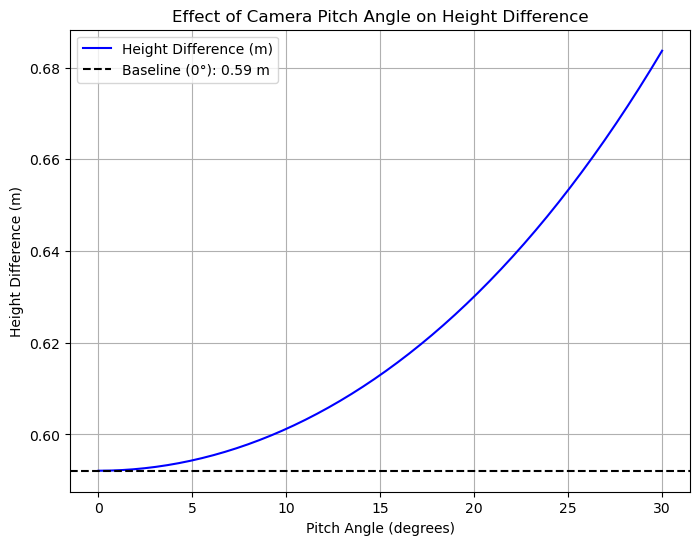

Baseline Height Difference (0° pitch): 0.5921 m
Height Difference at 30° pitch: 0.6837 m


In [15]:
def height_difference_with_pitch(pixel_diff, distance, focal_length, sensor_size, image_resolution, pitch_angle):
    """
    Compute height difference using perspective projection with pitch angle correction.
    
    Parameters:
    - pixel_diff: Pixel difference (Delta y) in pixels
    - distance: Horizontal distance (meters)
    - focal_length: Focal length (meters)
    - sensor_size: Sensor size (meters)
    - image_resolution: Image resolution (pixels)
    - pitch_angle: Pitch angle (degrees, positive downward)
    
    Returns:
    - Height difference in meters
    """
    pixel_scale = sensor_size / image_resolution  # Derive pixel scale (meters/pixel)
    pitch_correction = np.cos(np.radians(pitch_angle))  # cos(theta) correction
    return (distance * pixel_diff * pixel_scale) / (focal_length * pitch_correction)

pitch_angles = np.linspace(0, 30, 50)  # Pitch angles from 0 to 30 degrees

# Compute height differences for various pitch angles
height_differences = [
    height_difference_with_pitch(baseline_pixel, baseline_distance, baseline_focal, sensor_size, image_resolution, theta)
    for theta in pitch_angles
]

# Baseline height difference at 0 degrees
baseline_height = height_differences[0]

# Plot height difference vs. pitch angle
plt.figure(figsize=(8, 6))
plt.plot(pitch_angles, height_differences, label="Height Difference (m)", color="blue")
plt.axhline(baseline_height, color='k', linestyle='--', label=f"Baseline (0°): {baseline_height:.2f} m")
plt.xlabel("Pitch Angle (degrees)")
plt.ylabel("Height Difference (m)")
plt.title("Effect of Camera Pitch Angle on Height Difference")
plt.legend()
plt.grid(True)
plt.show()

# Print baseline and example results
print(f"Baseline Height Difference (0° pitch): {baseline_height:.4f} m")
print(f"Height Difference at 30° pitch: {height_differences[-1]:.4f} m")


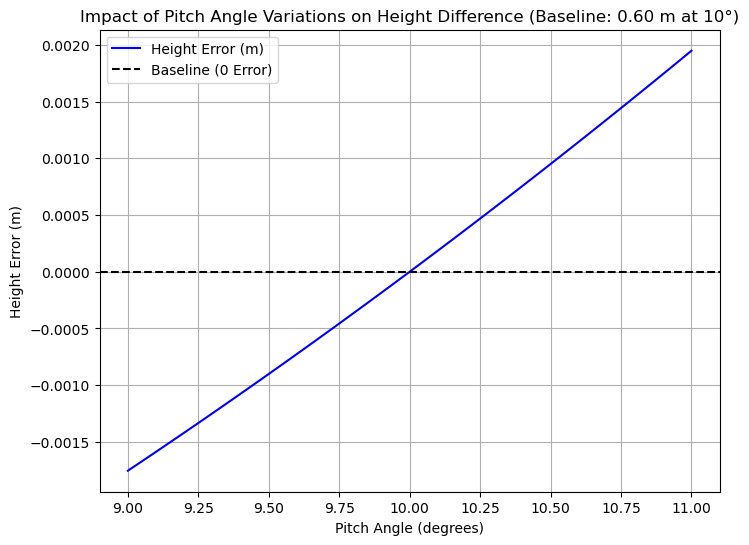

Baseline Height Difference (10° pitch): 0.6012 m
Pitch Angle at -10% Error: 9.00°, Height Error: -0.0018 m
Pitch Angle at +10% Error: 11.00°, Height Error: 0.0019 m


In [ ]:
def compute_pitch_angle_errors(baseline_pixel, baseline_distance, baseline_focal, 
                               sensor_size, image_resolution, baseline_pitch, percent_error_range):
    """
    Compute the pitch angles and height difference errors for pitch angle variations.
    """
    # Convert percent errors to pitch angles
    pitch_angles = baseline_pitch * (1 + percent_error_range / 100.0)

    # Baseline height difference
    baseline_height = height_difference_with_pitch(baseline_pixel, baseline_distance, baseline_focal, 
                                                   sensor_size, image_resolution, baseline_pitch)

    # Compute height errors for each pitch angle
    height_errors = [
        height_difference_with_pitch(baseline_pixel, baseline_distance, baseline_focal, 
                                     sensor_size, image_resolution, angle) - baseline_height
        for angle in pitch_angles
    ]

    return pitch_angles, height_errors, baseline_height

# Updated parameters
baseline_pitch = 10         # Baseline pitch angle in degrees

# Compute pitch angle range and height errors
pitch_angles, height_errors, baseline_height = compute_pitch_angle_errors(
    baseline_pixel, baseline_distance, baseline_focal, 
    sensor_size, image_resolution, baseline_pitch, percent_error_range
)

# Plot pitch angles vs height errors
plt.figure(figsize=(8, 6))
plt.plot(pitch_angles, height_errors, label="Height Error (m)", color="blue")
plt.axhline(0, color='k', linestyle='--', label="Baseline (0 Error)")
plt.xlabel("Pitch Angle (degrees)")
plt.ylabel("Height Error (m)")
plt.title(f"Impact of Pitch Angle Variations on Height Difference (Baseline: {baseline_height:.2f} m at {baseline_pitch}°)")
plt.legend()
plt.grid(True)
plt.show()

# Print baseline and example results
print(f"Baseline Height Difference ({baseline_pitch}° pitch): {baseline_height:.4f} m")
print(f"Pitch Angle at -10% Error: {pitch_angles[0]:.2f}°, Height Error: {height_errors[0]:.4f} m")
print(f"Pitch Angle at +10% Error: {pitch_angles[-1]:.2f}°, Height Error: {height_errors[-1]:.4f} m")
